# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("K:/online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### 1)what is the average pages visited in different types of page category

In [4]:
dict={'Average_pages_visit':[int(df.Administrative.mean()),
int(df.Informational.mean()),
int(df.ProductRelated.mean())]}
df1=pd.DataFrame(dict,index=['Administrative','Informational','ProductRelated'])
df1

,Average_pages_visit
Administrative,2
Informational,0
ProductRelated,31


### 2)what is the maximum duration spent in different page category

In [5]:
data={'Maximum_duration':[df.Administrative_Duration.max(),
df.Informational_Duration.max(),
df.ProductRelated_Duration.max()]}
maxi=pd.DataFrame(data,index=['Administrative_Duration','Informational_Duration','ProductRelated_Duration',])
maxi


,Maximum_duration
Administrative_Duration,3398.75000
Informational_Duration,2549.37500
ProductRelated_Duration,63973.52223


### 3)correlation between the pages_duration and Bounce rate?

<Axes: >

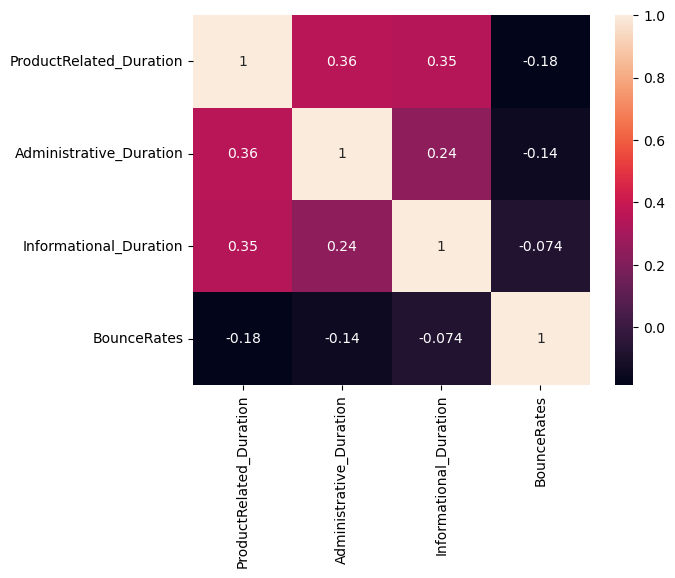

In [7]:
sns.heatmap(data=df.loc[:,['ProductRelated_Duration','Administrative_Duration','Informational_Duration','BounceRates']].corr(),annot=True)

### 4)If the bounce rate is 0 ,what will be the maximum duration spent by the user in productRelated page?

In [23]:
page=df['ProductRelated_Duration'].where(df['BounceRates']==0)
print(f'Maximum ProductRelated_Duration when Bounce Rate is 0 : {page.max()}')

Maximum ProductRelated_Duration when Bounce Rate is 0 : 14129.8808


### 5)what is the count of Revenue by month?

In [62]:
Revenue=df.groupby(['Revenue','Month'])['Revenue'].count()
Revenue

Revenue  Month
False    Aug       357
         Dec      1511
         Feb       181
         Jul       366
         June      259
         Mar      1715
         May      2999
         Nov      2238
         Oct       434
         Sep       362
True     Aug        76
         Dec       216
         Feb         3
         Jul        66
         June       29
         Mar       192
         May       365
         Nov       760
         Oct       115
         Sep        86
Name: Revenue, dtype: int64

### 6)what is the maximum page value?

In [64]:
print(f'The Maximum pagevalue : {df.PageValues.max()}')

The Maximum pagevalue : 361.7637419


### 7)If revenue is True ,where page value is high?

In [66]:
df['Revenue'][df['PageValues']==df.PageValues.max()]

9239    True
Name: Revenue, dtype: bool

### 8)Most revenue generated on weekends or weekdays?

In [84]:
week=df['Revenue'].apply(lambda x: 'Weekend'if x==True else 'Weekday')
w=week[week=='Weekday'].count()
we=week[week=='Weekend'].count()
print(f'people count on Weekdays :{w}\npeople count on Weekends :{we}')

people count on Weekdays :10422
people count on Weekends :1908


### 9)Most of the Revenue generating customers from which region?

In [122]:
reg=df[df['Revenue']==True]
reg=pd.DataFrame(data=reg.groupby(['Region'])['Region'].count().sort_values(ascending=False))
reg.columns.names=['Revenue_count by']
reg

Revenue_count by,Region
Region,
1,771
3,349
2,188
4,175
7,119
6,112
9,86
8,56
5,52


### 10)Most of the Revenue generating customers using which os,browser?

In [151]:
rev=df[df['Revenue']==True]
o=rev.OperatingSystems.mean()
r=rev.Browser.mean()
print(f'OperatingSystem :{int(o)}\nBrowser :{int(r)}')

OperatingSystem :2
Browser :2


### 11)More revenue generated of which month (using count plot)?


Text(0.5, 1.0, 'The Revenue plot based on month')

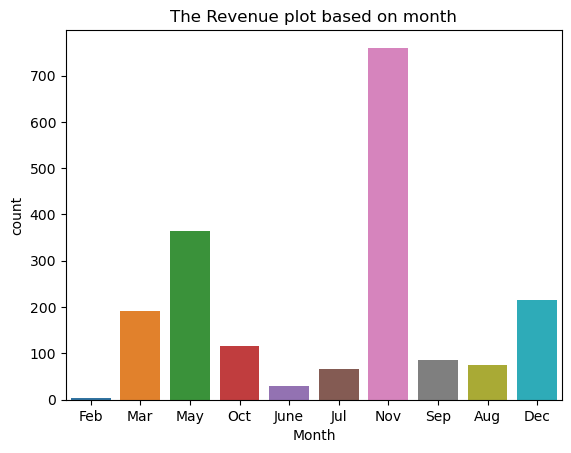

In [157]:
rev=df[df['Revenue']==True]
plot=rev.loc[:,['Month','Revenue']]
sns.countplot(plot,x='Month')
plt.title('The Revenue plot based on month')

### 12)Most of special days occur on which month

In [170]:
mon=df['Month'][df['SpecialDay']==1]
mon=list(mon.unique())
print(f'The most Specialdays occur months: {mon}')

The most Specialdays occur months: ['Feb', 'May']
